<a href="https://colab.research.google.com/github/JohnEaganFS/CSCI191T/blob/main/FeedForwardNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSCI 191T - Machine Learning
##Name: John Eagan 
##Assignment: Feed Forward Network w/ 2 Hidden Units

<div>
<img src=https://drive.google.com/uc?export=view&id=1e0DPR_52rzTdWaf7RaVY5KEjpiBSPMDX width="500">
</div>

Given weight vectors $w_1$, $w_2$, $v_1$ and test points for ($x_1$, $x_2$), 

calculate $z_1$ and $z_2$ to calculate $y_1$ for each test point.

In [13]:
import math
import plotly.express as px

## F(w, x), Sigmoid, and Classify Functions

In [14]:
def F(W,X):
  return sum([w*x for w,x in zip(W,X)])

In [15]:
def sigmoid(x):
  return 1.0/(1+math.exp(-x))

In [16]:
def classify(model, X):
  return [1 if sigmoid(F(model, x)) > 0.5 else 0 for x in X]

##Weight Vectors

Weights are given.

$w_1$ = ($w_{1,0}$, $w_{1,1}$, $w_{1,2}$)

$w_1$ = ($w_{2,0}$, $w_{2,1}$, $w_{2,2}$)

$v_1$ = ($v_{1,0}$, $v_{1,1}$, $v_{1,2}$)

In [17]:
w1 = (3.19304864, 9.93278091, -4.74659947)
w2 = (-1.59451474, 9.97879746, 4.47953684)
v1 = (0.32620883, -8.71647388, 8.39004239)

## $x_0$, $x_1$, and $x_2$

Four test points given for ($x_1$, $x_2$).

$x_0$ is the bias term (equal to 1)

In [18]:
X = [(0,0), (0,1), (1,0), (1,1)]
x1 = [x1 for (x1, x2) in X]
x2 = [x2 for (x1, x2) in X]
print("Test Points:", X)

xData = [(1,x1,x2) for (x1,x2) in X]
print("X:", xData)

Test Points: [(0, 0), (0, 1), (1, 0), (1, 1)]
X: [(1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


## $z_0$, $z_1$, and $z_2$

Calculate $z_i$ as sigmoid(F($w_i$, $x$)) where $x$ = ($x_0$, $x_1$, $x_2$) for given test point.

$z_0$ is the bias term (equal to 1)

In [19]:
# Performing z1 and z2 calculations for all test points
z1 = [sigmoid(F(w1, x)) for x in xData]
z2 = [sigmoid(F(w2, x)) for x in xData]

# z = (z_0, z_1, z_2) = (1, z_1, z_2) for each test point
zData = [(1, z_1, z_2) for (z_1, z_2) in zip(z1, z2)]
print("z1:", z1)
print("z2:", z2)
print("Z:", zData)

z1: [0.9605718456066229, 0.17457400953677152, 0.9999980069243171, 0.9997704660571543]
z2: [0.16874965243320605, 0.9471010398304239, 0.9997716226203648, 0.9999974099209205]
Z: [(1, 0.9605718456066229, 0.16874965243320605), (1, 0.17457400953677152, 0.9471010398304239), (1, 0.9999980069243171, 0.9997716226203648), (1, 0.9997704660571543, 0.9999974099209205)]


## $y_1$ (Output)

Calculate $y_1$ as F($v_1$, $z$) where $z$ = ($z_0$, $z_1$, $z_2$) for some test point.

In [20]:
y1 = [F(v1, z) for z in zData]
print("y1:", y1)

print("Output for given Input (x1, x2):", list(zip(X, y1)))

y1: [-6.630773834881156, 6.750756907536195, -0.0021213833039261942, 0.0017563357441172656]
Output for given Input (x1, x2): [((0, 0), -6.630773834881156), ((0, 1), 6.750756907536195), ((1, 0), -0.0021213833039261942), ((1, 1), 0.0017563357441172656)]


Classification of each test point based on $y_1$

In [21]:
classification = classify(v1, zData)
print("Class Predictions:", classification)

testClassifications = list(zip(X, classification))
print(testClassifications)

Class Predictions: [0, 1, 0, 1]
[((0, 0), 0), ((0, 1), 1), ((1, 0), 0), ((1, 1), 1)]


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

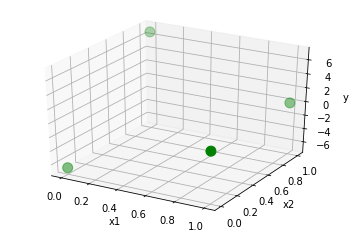

In [25]:
# Plotting test points (x1, x2) and predicted output y1
ax = plt.axes(projection = '3d')
plt.xlabel("x1")
plt.ylabel("x2")
ax.set_zlabel("y1")
ax.scatter3D(x1, x2, y1, c='g', s=100)